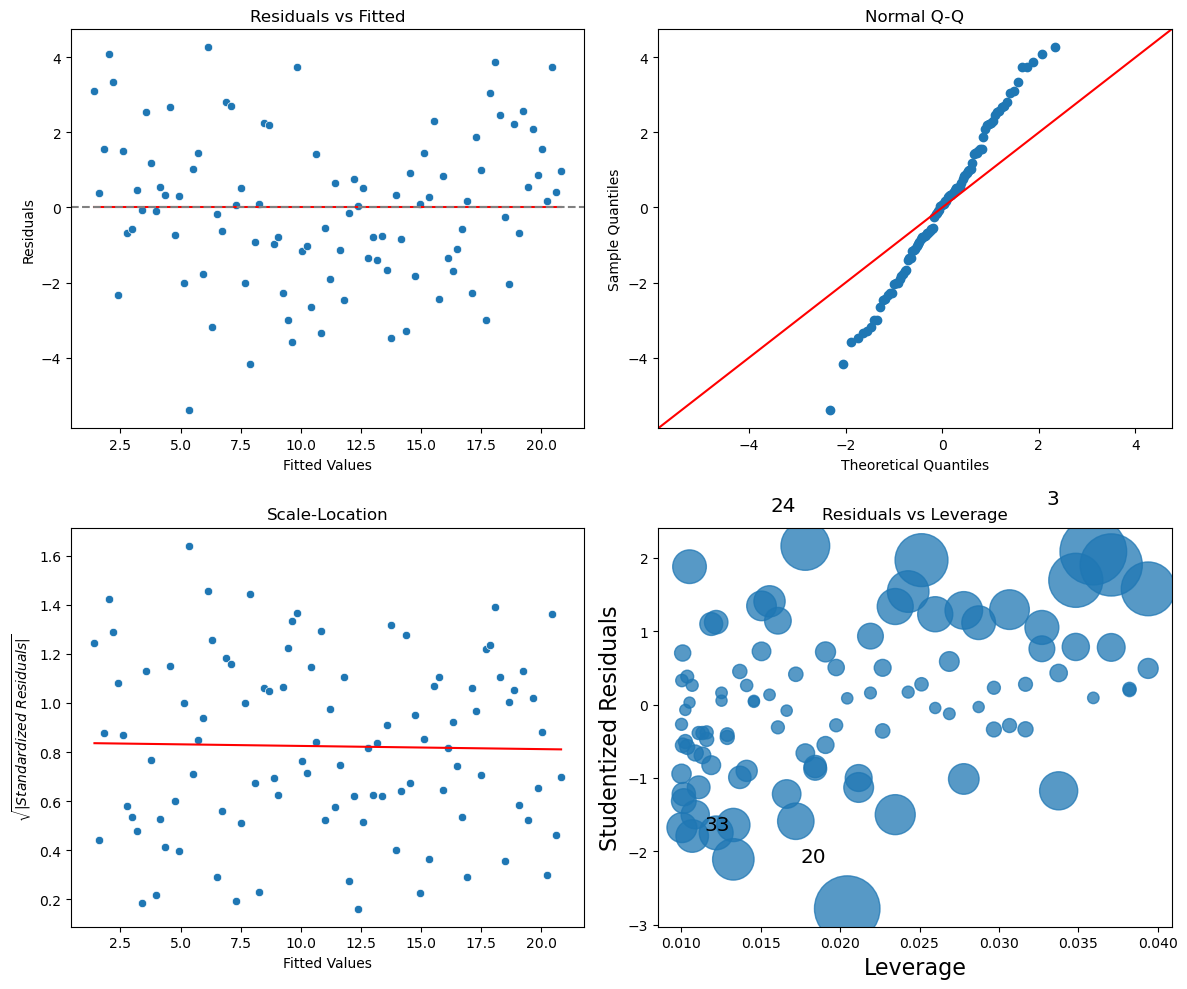

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Generate example data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(scale=2, size=X.shape)

# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Generate diagnostic plots
def plot_diagnostics(model):
    fig = plt.figure(figsize=(12, 10))
    
    # Residuals vs Fitted
    ax1 = fig.add_subplot(221)
    fitted_values = model.fittedvalues
    residuals = model.resid
    sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
    sns.lineplot(x=fitted_values, y=np.polyval(np.polyfit(fitted_values, residuals, 1), fitted_values), color='red', ax=ax1)
    ax1.axhline(0, linestyle='--', color='grey')
    ax1.set_title('Residuals vs Fitted')
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    
    # Q-Q Plot
    ax2 = fig.add_subplot(222)
    sm.qqplot(residuals, line='45', ax=ax2)
    ax2.set_title('Normal Q-Q')
    
    # Scale-Location Plot
    ax3 = fig.add_subplot(223)
    standardized_residuals = residuals / np.std(residuals)
    sns.scatterplot(x=fitted_values, y=np.sqrt(np.abs(standardized_residuals)), ax=ax3)
    sns.lineplot(x=fitted_values, y=np.polyval(np.polyfit(fitted_values, np.sqrt(np.abs(standardized_residuals)), 1), fitted_values), color='red', ax=ax3)
    ax3.set_title('Scale-Location')
    ax3.set_xlabel('Fitted Values')
    ax3.set_ylabel(r'$\sqrt{|Standardized\ Residuals|}$')
    
    # Residuals vs Leverage
    ax4 = fig.add_subplot(224)
    sm.graphics.influence_plot(model, ax=ax4, criterion="cooks")
    ax4.set_title('Residuals vs Leverage')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot diagnostics
plot_diagnostics(model)


In [18]:
import pandas as pd
Auto = pd.read_csv('../../ALL_CSV_FILES/Auto.csv')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


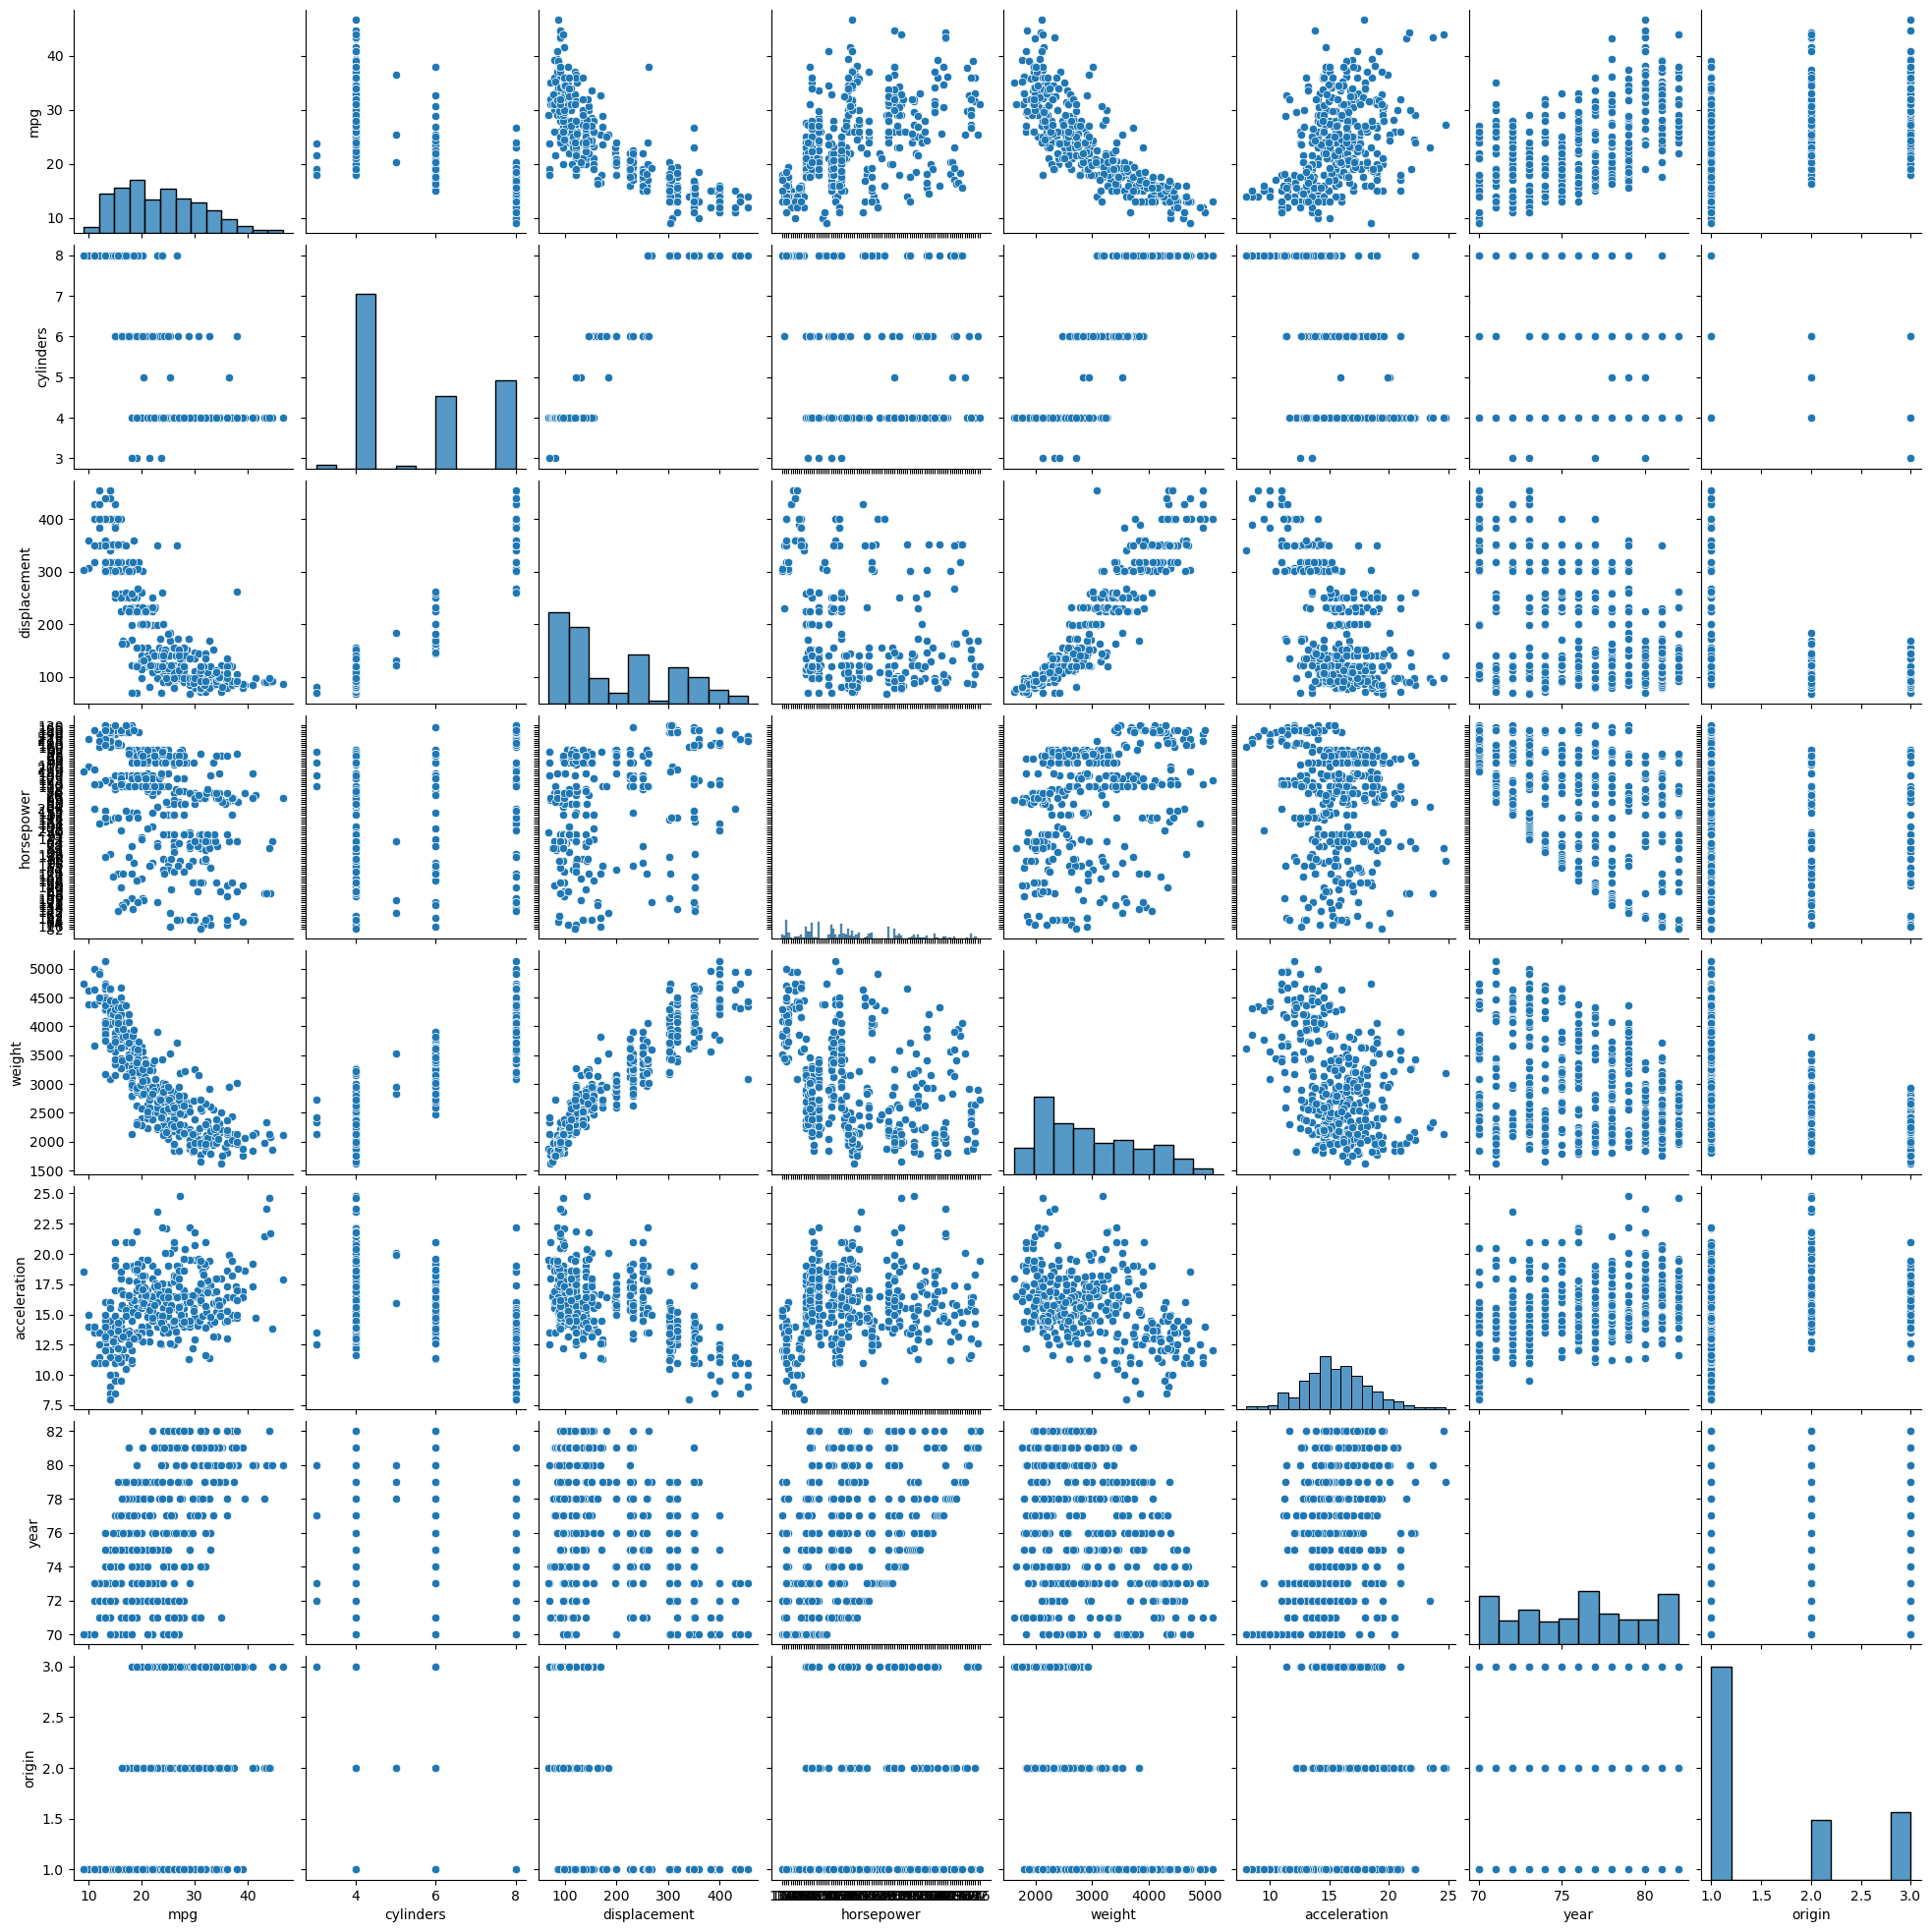

In [27]:
# Generate the pairplot
sns.pairplot(Auto, vars=['mpg', 'cylinders', 'displacement', 'horsepower', 
                       'weight', 'acceleration', 'year', 'origin'])

# Show the plot
plt.show()